In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import plot_confusion_matrix, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

In [0]:
dataset = keras.datasets.mnist

In [0]:
(X_trainfull, Y_trainfull), (X_testfull, Y_testfull) = dataset.load_data()

In [73]:
print(X_trainfull.shape[0],'X train samples')
print(X_testfull.shape[0],'X test samples')
print(Y_trainfull.shape[0], 'Y train samples')
print(Y_testfull.shape[0],'Y test samples')

60000 X train samples
10000 X test samples
60000 Y train samples
10000 Y test samples


In [74]:
pd.Series(Y_trainfull).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [75]:
pd.Series(Y_testfull).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [0]:
X_train = X_trainfull[:600]
Y_train = Y_trainfull[:600]
X_test = X_testfull[:100]
Y_test = Y_testfull[:100]

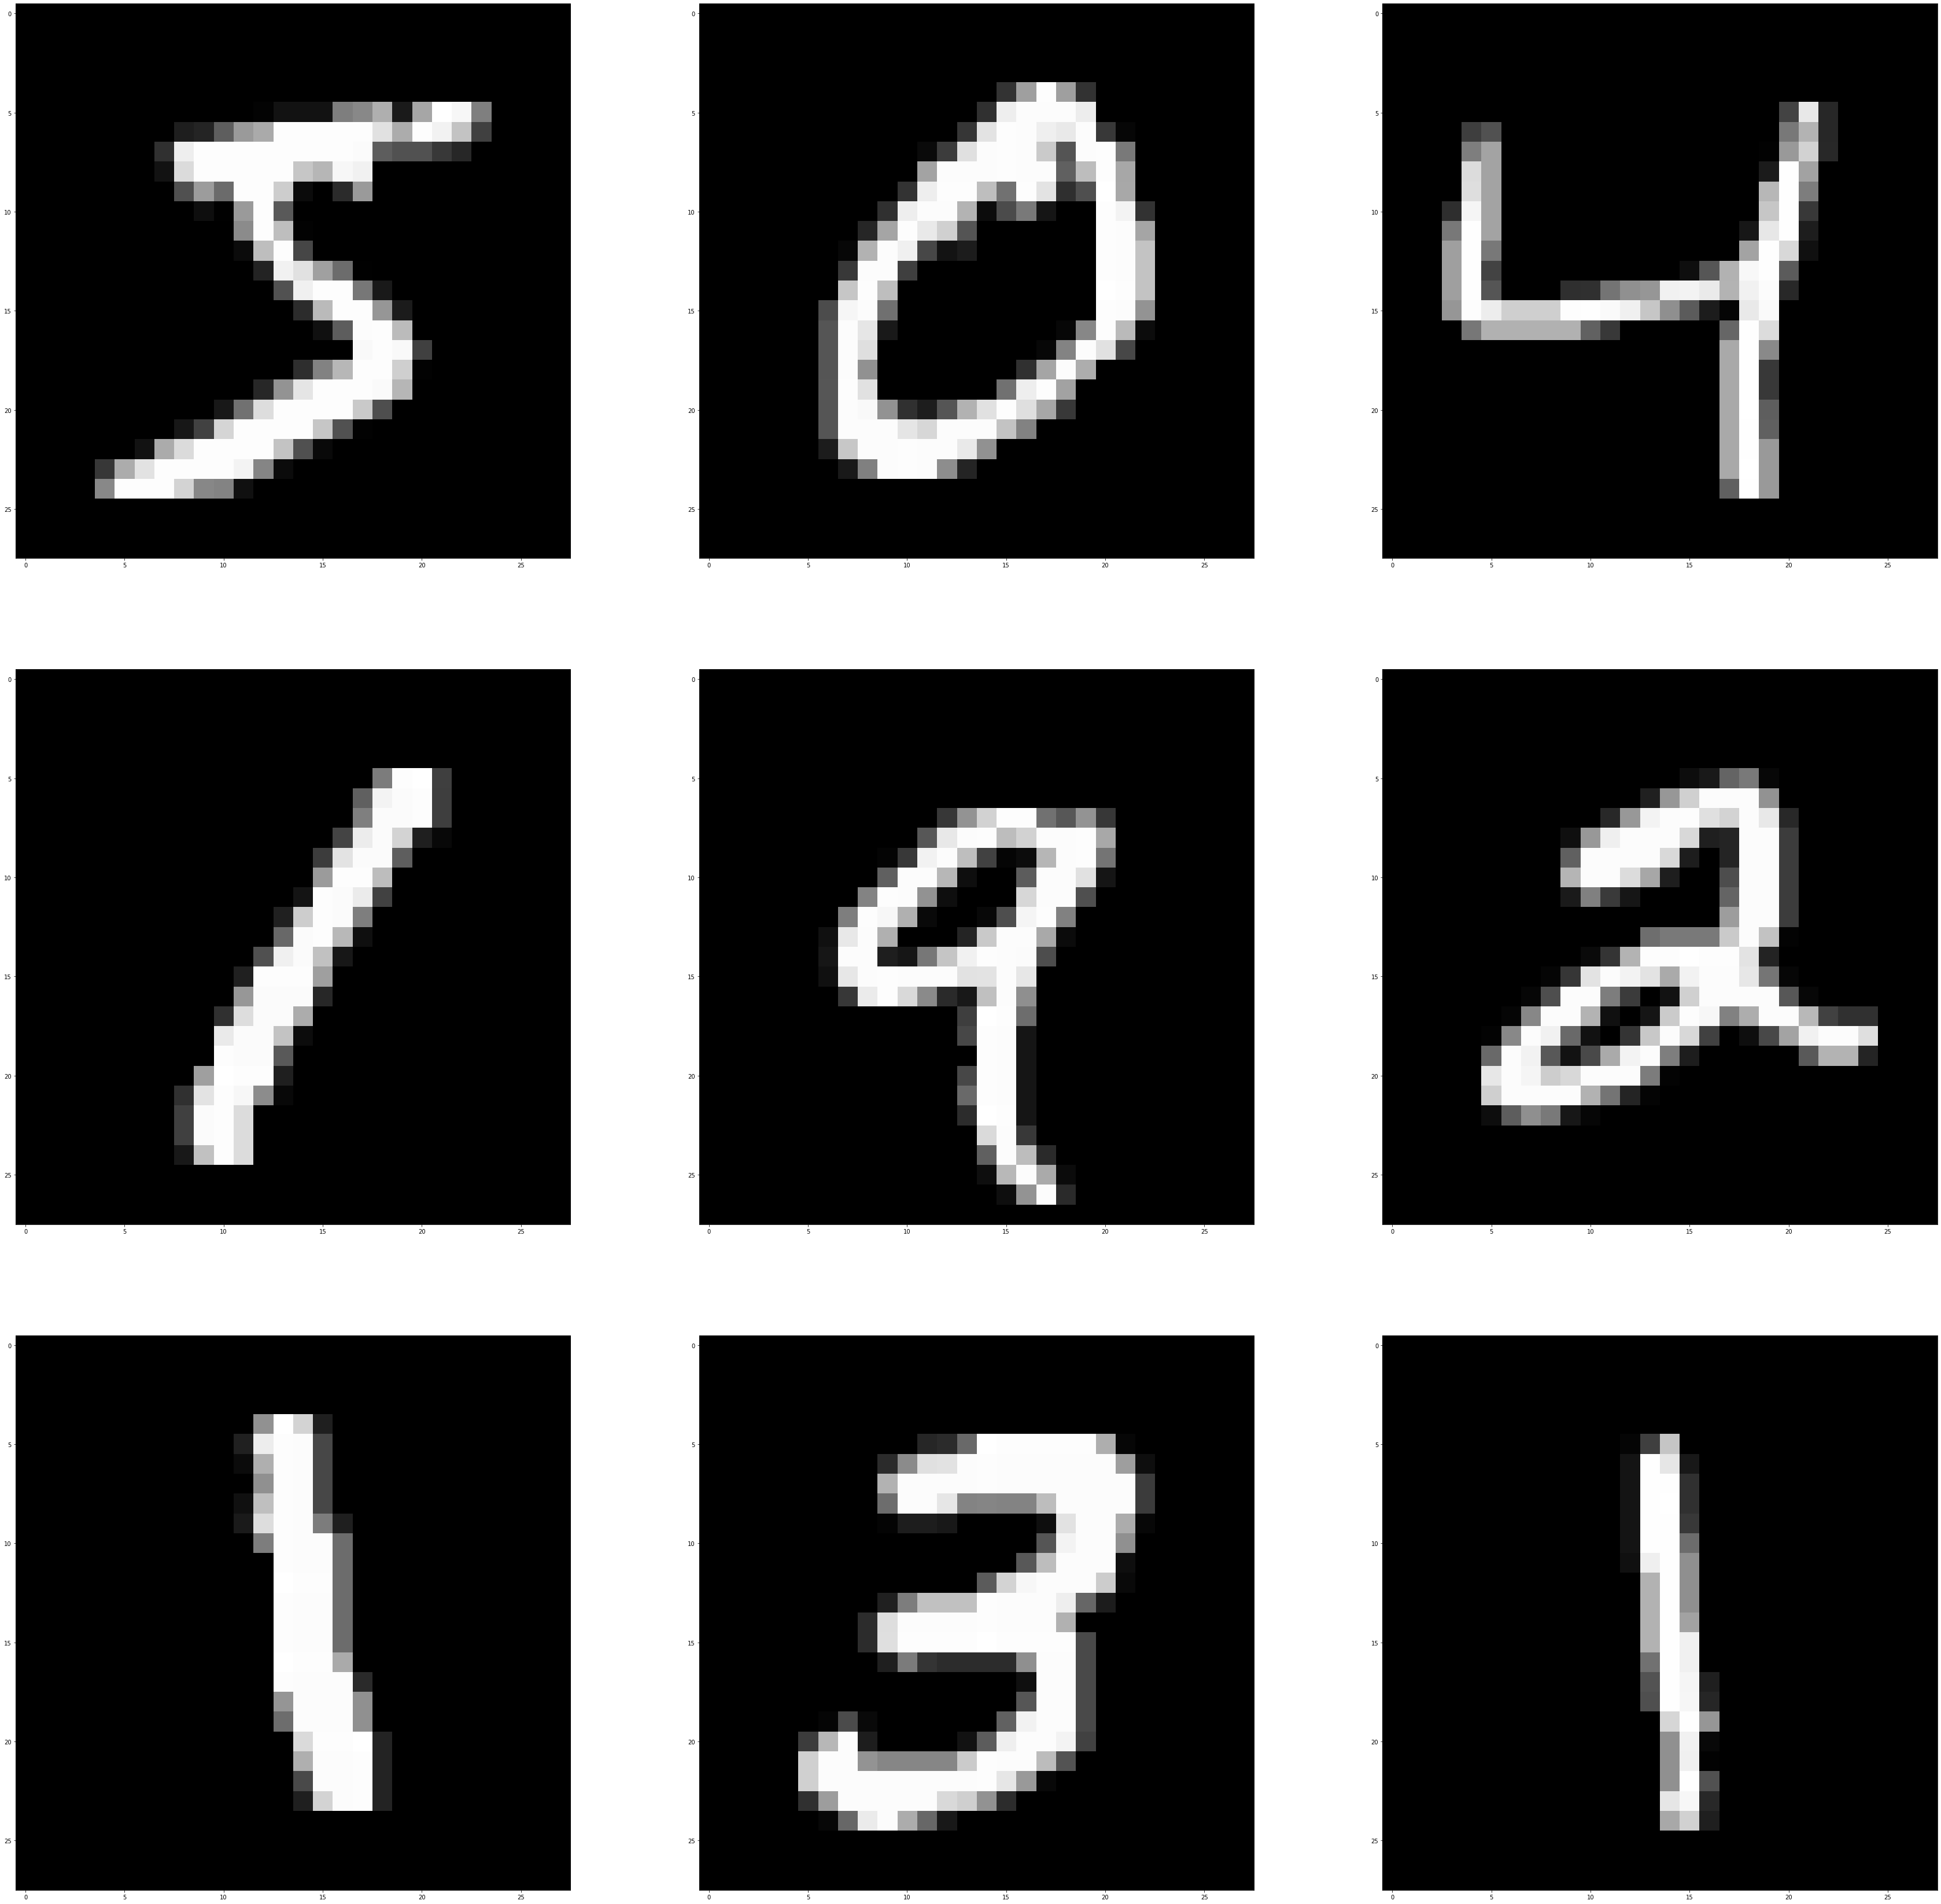

In [77]:
# Visualize one digit
plt.figure(figsize=(60,60))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i],cmap='gray')
plt.show()

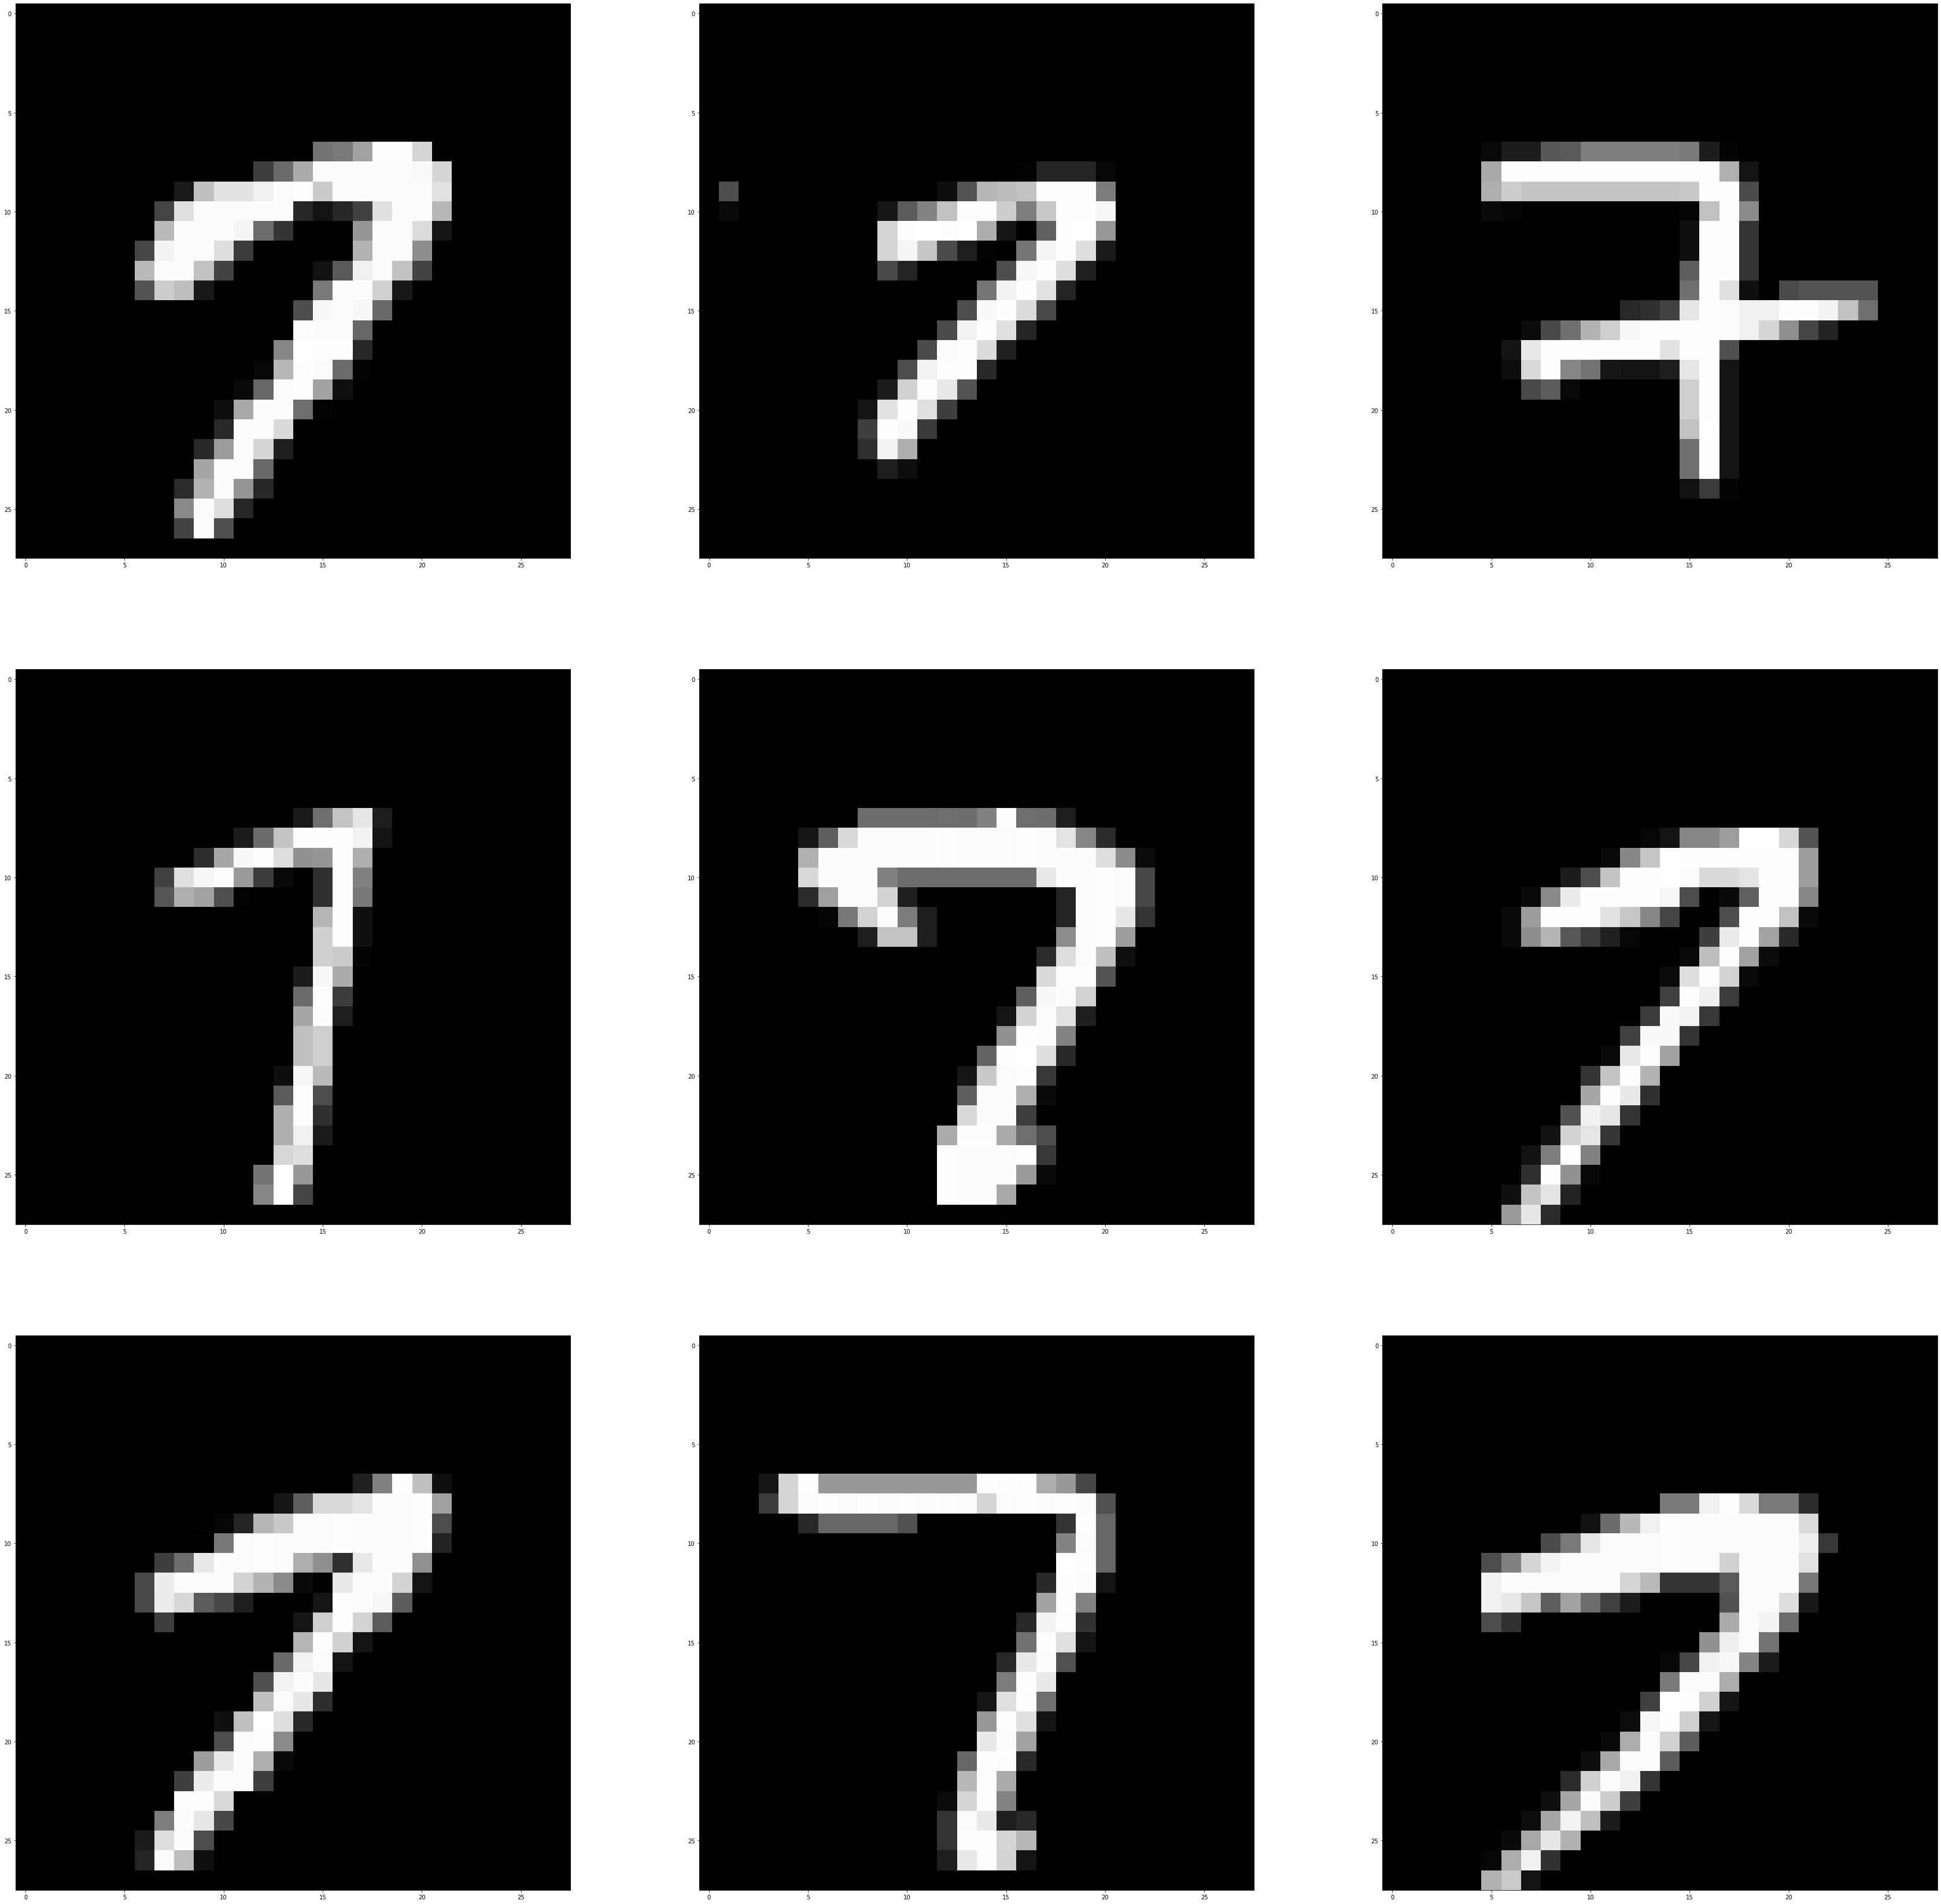

In [78]:
count = 0
plt.figure(figsize=(60,60))
for i in range(len(X_train)):
    if Y_train[i] == 7:
        plt.subplot(3,3,count+1)
        plt.imshow(X_train[i],cmap='gray')
        count += 1
    if count == 9:
        break
plt.show()

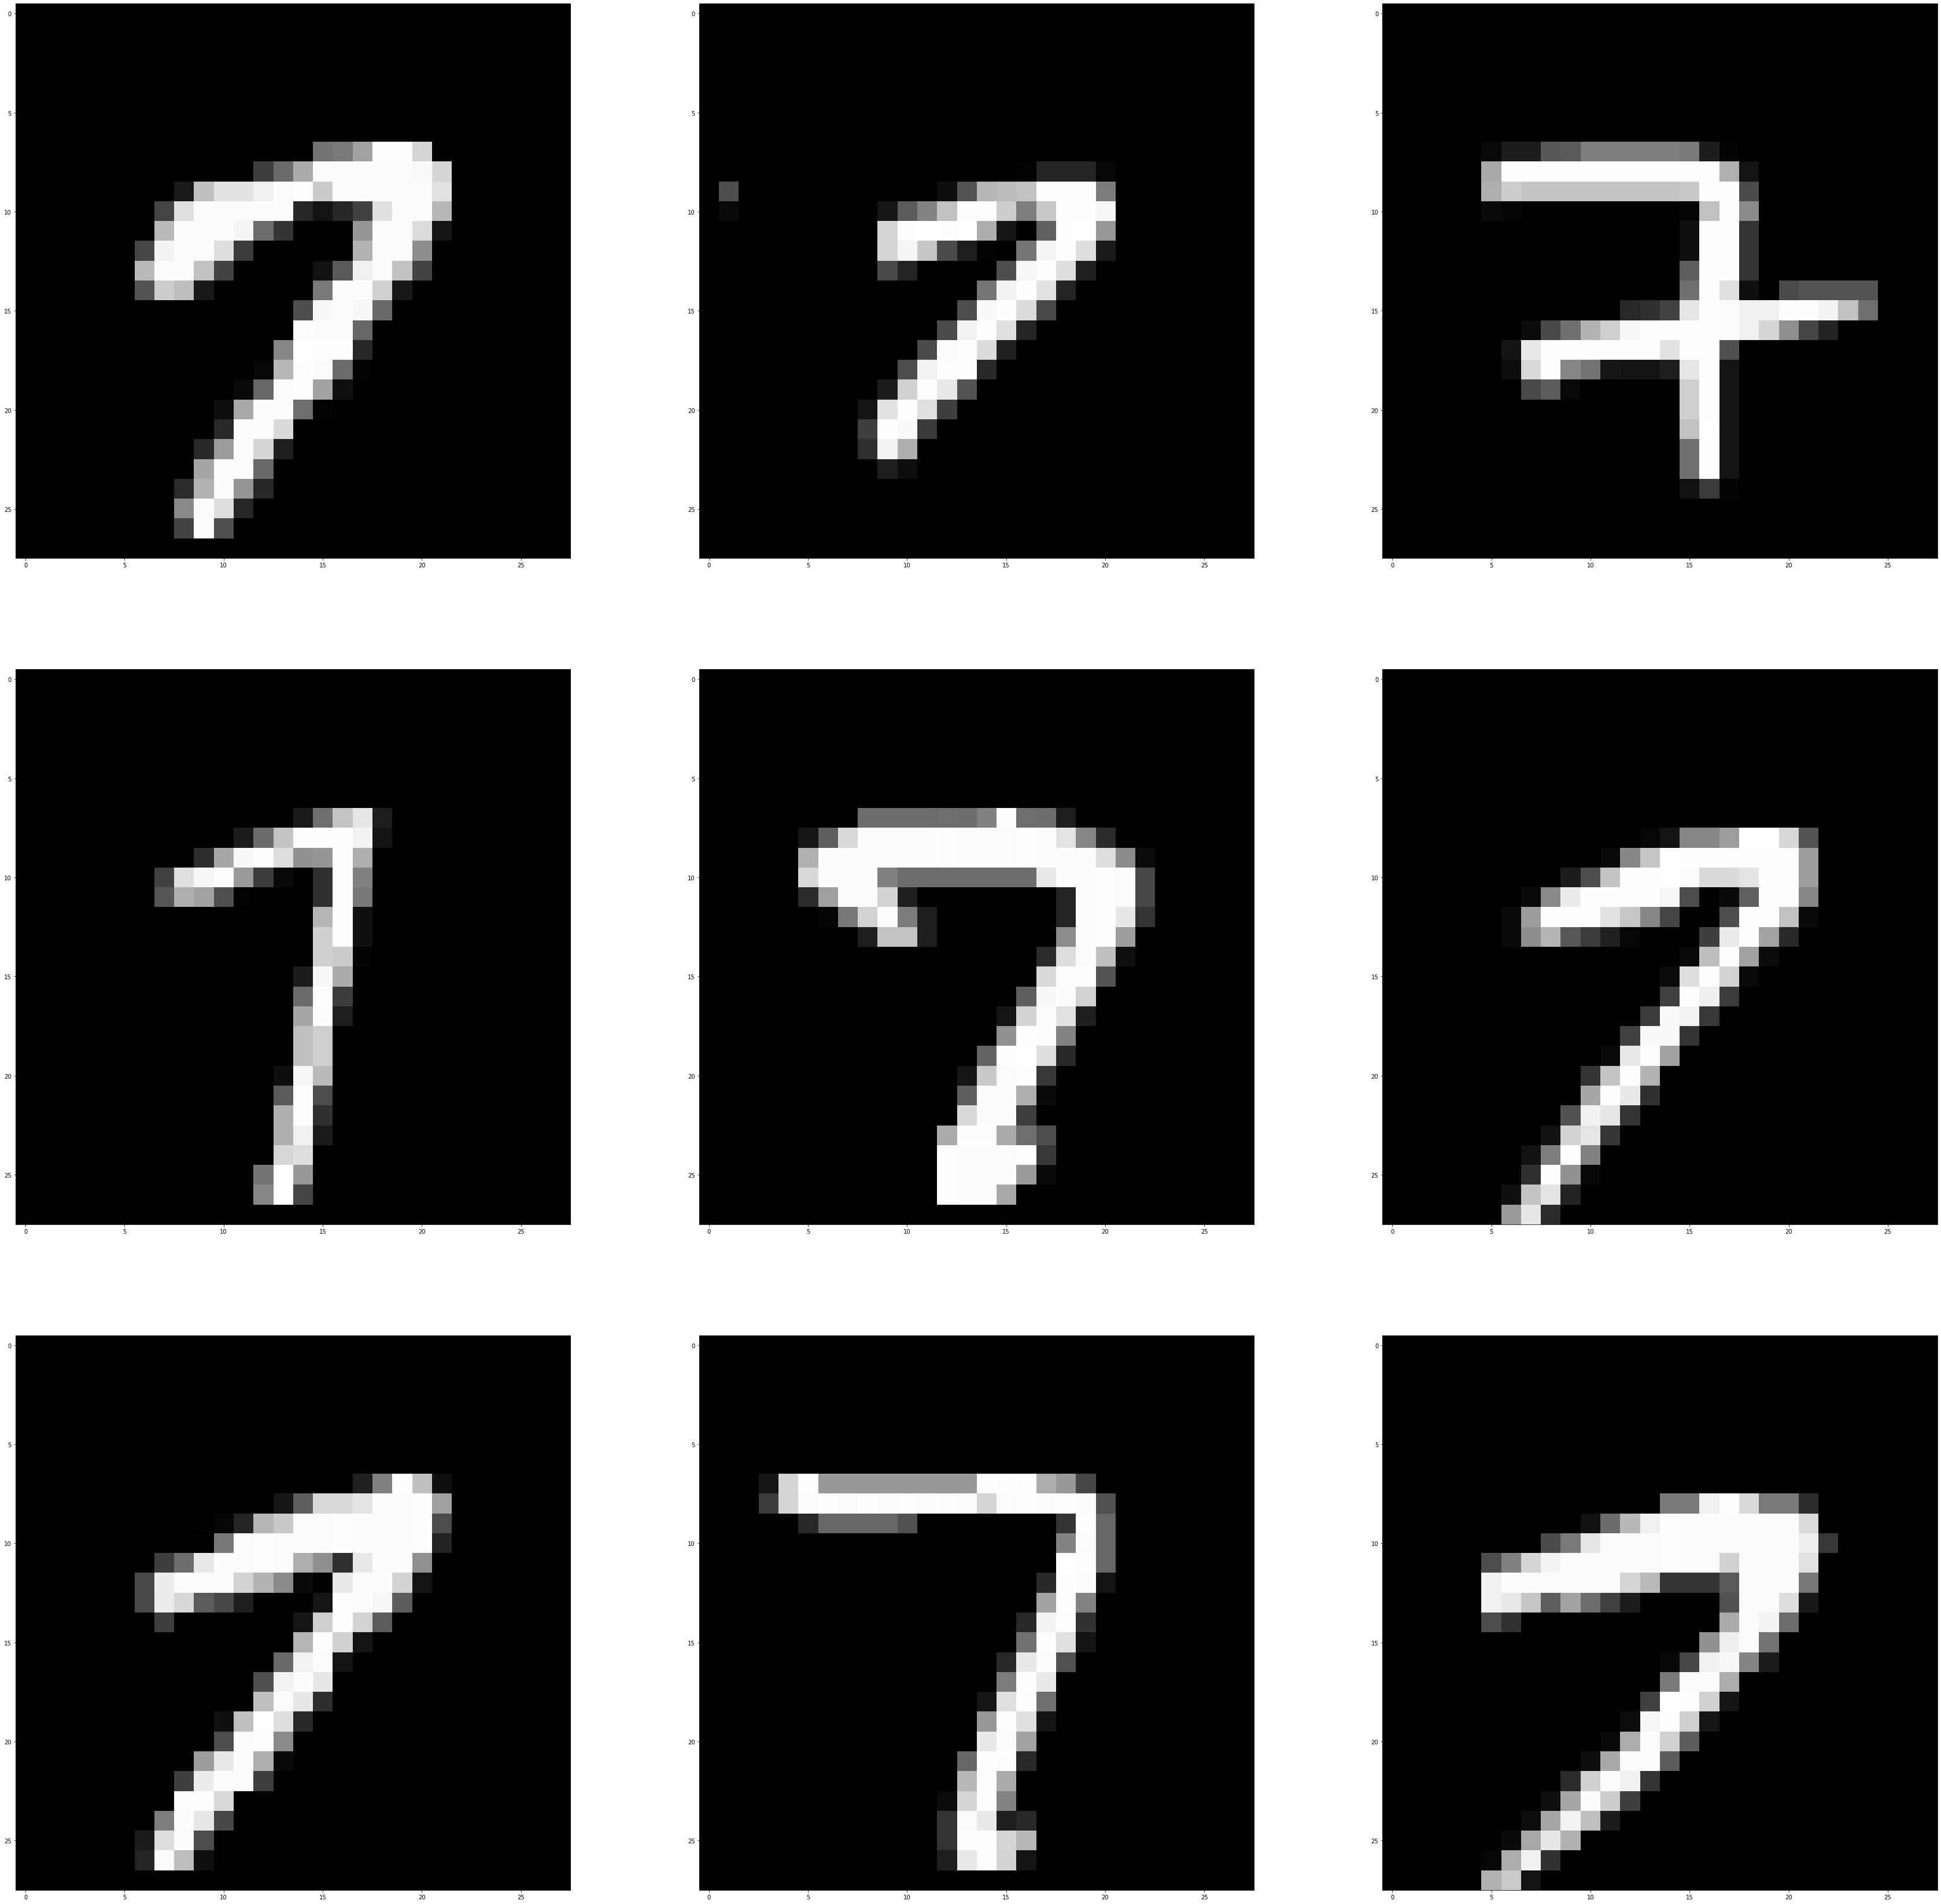

In [79]:
plt.figure(figsize=(60,60))
pics7_indices = np.where(Y_train == 7)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[pics7_indices[0][i]],cmap='gray')
plt.show()

In [0]:
nsample, nx, ny = X_test.shape
X_test = X_test.reshape(nsample,nx*ny)
nsample, nx, ny = X_train.shape
X_train = X_train.reshape(nsample,nx*ny)

Confusion matrix with k = 1 and minkowski distance


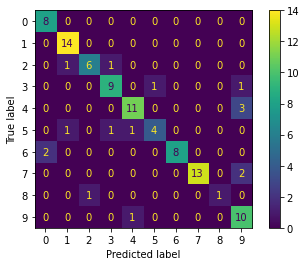

Confusion matrix with k = 1 and cosine distance


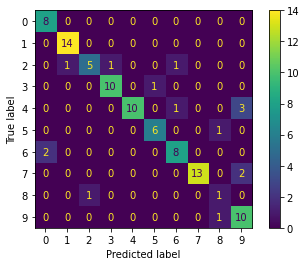

Confusion matrix with k = 1 and euclidean distance


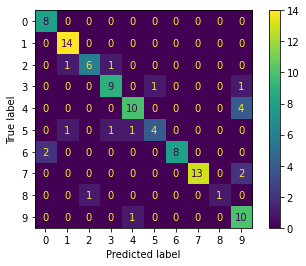

Confusion matrix with k = 3 and minkowski distance


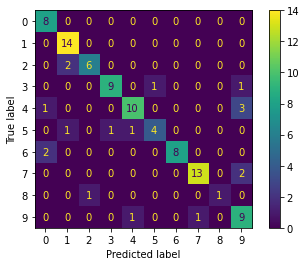

Confusion matrix with k = 3 and cosine distance


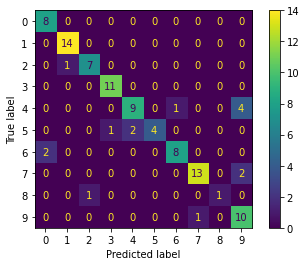

Confusion matrix with k = 3 and euclidean distance


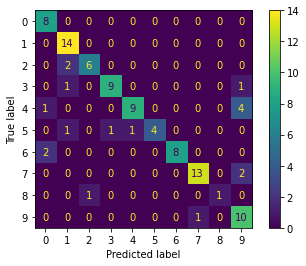

Confusion matrix with k = 5 and minkowski distance


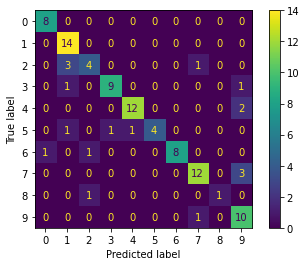

Confusion matrix with k = 5 and cosine distance


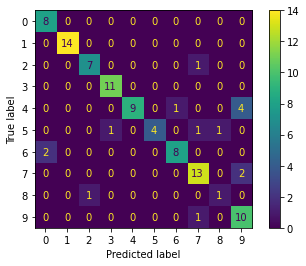

Confusion matrix with k = 5 and euclidean distance


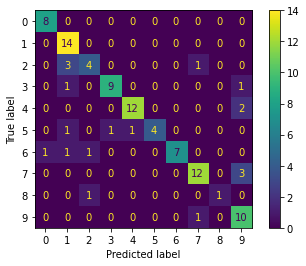

Confusion matrix with k = 7 and minkowski distance


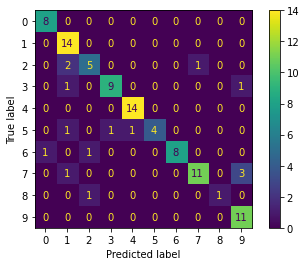

Confusion matrix with k = 7 and cosine distance


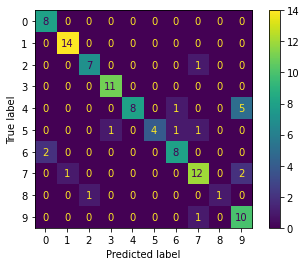

Confusion matrix with k = 7 and euclidean distance


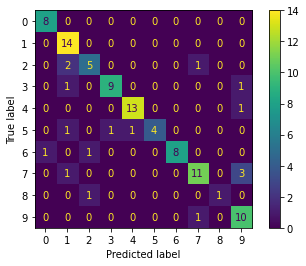

In [86]:
distance = ['minkowski', 'cosine', 'euclidean']
df = pd.DataFrame(columns = ['k', 'Distance', 'Accuracy of values'])
for i in range(1,8,2):
    for j in distance:
        model = KNN(n_neighbors = i,metric = j, p = 3)
        model.fit(X_train, Y_train)
        print('Confusion matrix with k = {} and {} distance'.format(i,j))
        plot_confusion_matrix(model, X_test, Y_test)
        plt.show()
    
        #In ra độ chính xác và kết quả độ đo của từng model
        accuracy_score = model.score(X_test, Y_test)
        df = df.append(pd.DataFrame([[i,j,accuracy_score]], columns = ['k', 'Distance', 'Accuracy of values']), ignore_index = True)
    
    

In [87]:
df

,k,Distance,Accuracy of values
0,1,minkowski,0.84
1,1,cosine,0.85
2,1,euclidean,0.83
3,3,minkowski,0.82
4,3,cosine,0.85
5,3,euclidean,0.82
6,5,minkowski,0.82
7,5,cosine,0.85
8,5,euclidean,0.81
9,7,minkowski,0.85
